<strong><b><font size="5">CNN Image Classification and Model Deployment using Flask in Python</font></b></strong>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Environment-setup-&amp;-Importing-libraries" data-toc-modified-id="Environment-setup-&amp;-Importing-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Environment setup &amp; Importing libraries</a></span></li><li><span><a href="#Download-and-load-Cifar-10-dataset" data-toc-modified-id="Download-and-load-Cifar-10-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Download and load Cifar-10 dataset</a></span></li><li><span><a href="#Exploring-the-dataset" data-toc-modified-id="Exploring-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring the dataset</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Normalize" data-toc-modified-id="Normalize-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Normalize</a></span></li><li><span><a href="#One-hot-encoding---Convert-class-labels-to-binary-class-labels" data-toc-modified-id="One-hot-encoding---Convert-class-labels-to-binary-class-labels-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>One-hot encoding - Convert class labels to binary class labels</a></span></li><li><span><a href="#GPU-processing" data-toc-modified-id="GPU-processing-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>GPU processing</a></span></li></ul></li><li><span><a href="#Architecture-of-a-Convolution-Neural-Network:" data-toc-modified-id="Architecture-of-a-Convolution-Neural-Network:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Architecture of a Convolution Neural Network:</a></span><ul class="toc-item"><li><span><a href="#Compiling-the-network" data-toc-modified-id="Compiling-the-network-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Compiling the network</a></span></li></ul></li><li><span><a href="#Analyzing-model-performance" data-toc-modified-id="Analyzing-model-performance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyzing model performance</a></span></li><li><span><a href="#Hyperparameter-tuning-deep-learning-models" data-toc-modified-id="Hyperparameter-tuning-deep-learning-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hyperparameter tuning deep learning models</a></span><ul class="toc-item"><li><span><a href="#Parameters---optimizing-neural-networks:" data-toc-modified-id="Parameters---optimizing-neural-networks:-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Parameters - optimizing neural networks:</a></span></li><li><span><a href="#Optimized-CNN-Architectures" data-toc-modified-id="Optimized-CNN-Architectures-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Optimized CNN Architectures</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Regularization</a></span></li></ul></li><li><span><a href="#Analyzing-model-performance" data-toc-modified-id="Analyzing-model-performance-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Analyzing model performance</a></span></li><li><span><a href="#Data-augmentation" data-toc-modified-id="Data-augmentation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Data augmentation</a></span></li><li><span><a href="#Model-Deployment-using-Flask" data-toc-modified-id="Model-Deployment-using-Flask-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model Deployment using Flask</a></span><ul class="toc-item"><li><span><a href="#Define-class-names-predicted-by-the-model-(in-the-right-order)" data-toc-modified-id="Define-class-names-predicted-by-the-model-(in-the-right-order)-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Define class names predicted by the model (in the right order)</a></span></li><li><span><a href="#Define-function-to-predict-the-passed-image-using-the-passed-model" data-toc-modified-id="Define-function-to-predict-the-passed-image-using-the-passed-model-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Define function to predict the passed image using the passed model</a></span></li><li><span><a href="#Define-flask-application" data-toc-modified-id="Define-flask-application-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Define flask application</a></span></li></ul></li><li><span><a href="#Further-model-improvements" data-toc-modified-id="Further-model-improvements-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Further model improvements</a></span></li><li><span><a href="#Solve-a-problem!" data-toc-modified-id="Solve-a-problem!-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Solve a problem!</a></span></li></ul></div>

## Environment setup & Importing libraries
- [Setup Environment for Deep Learning and Machine Learning](https://towardsdatascience.com/setup-an-environment-for-machine-learning-and-deep-learning-with-anaconda-in-windows-5d7134a3db10)
- Important Deep Learning Python Libraries:
 - __Theano:__ Theano is an open source Python library used to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays.
 - __Tensorflow:__ TensorFlow is an open source library for numerical computation using data flow graphs. Originally developed by the researchers on the Google Brain Team within Google’s Machine Intelligence research organization.
 - __Keras:__ A minimalist, modular, Neural Network library, Keras uses Theano or TensorFlow as a backend. It makes it easy and faster to experiment and implement ideas into results.

In [1]:
# Set as 1 to train models, 0 to skip model training and load pre-trained models (Training takes time if using CPU)
train_models_flag = 0

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, load_model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
from keras.datasets import cifar10
import os
import tensorflow as tf
from tensorflow.python.client import device_lib
import pickle
import pandas as pd
from skimage import io
from scipy import misc
import skimage.transform as st
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
from flask import Flask, request, render_template
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Download and load Cifar-10 dataset

- The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. 
- It is one of the most widely used datasets for machine learning research.
- The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
- The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.
- First time download: 170Mb
- Default Data Save location: C:\Users\{User name}\.keras\datasets
- [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

In [3]:
# Set the value of the image dimension ordering convention ('th' or 'tf').
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [4]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [5]:
#NUmber of Target Classes
num_classes

10

In [6]:
#Dimensions of Train dataset
train_features.shape

(50000, 3, 32, 32)

In [7]:
#Dimensions of Test dataset
test_features.shape

(10000, 3, 32, 32)

## Exploring the dataset

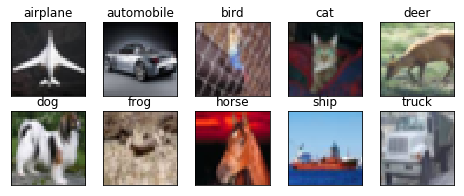

In [8]:
#Visualizing images for each class in the dataset

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    
    #Get 1st image row id for each class
    idx = np.where(train_labels[:]==i)[0]
    
    #Get features of the 1st image for each class
    features_idx = train_features[idx,::]
    
    #Transpose and plot images
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
    
plt.show()

## Preprocessing

### Normalize
- Convert image features to a 0-1 scale, from a 0-255 scale, by dividing with the maximum (255)
- Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network. 

In [9]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

### One-hot encoding - Convert class labels to binary class labels
- Converting multiclass target column into multiple binary target columns for using in a Machine Learning Model
- The classifier will be a multi-class classifier

In [10]:
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### GPU processing

Keras models can be run on GPU. Few things you will have to check first:

- Your system has GPU (Nvidia. As AMD doesn't work yet)
- You have installed the GPU version of tensorflow (pip install tensorflow-gpu)
- You have installed CUDA: [Installation instructions](https://www.tensorflow.org/install/)
- Verify that tensorflow is running with GPU: [Check if GPU is working](https://stackoverflow.com/questions/38009682/how-to-tell-if-tensorflow-is-using-gpu-acceleration-from-inside-python-shell)


In [11]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [12]:
# Check devices available in ternsorflow
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12608400927975364569
]


__Support Function to plot model accuracy and loss:__

In [13]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

__Support function to compute test accuracy:__

In [14]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## Architecture of a Convolution Neural Network:

<b>Convolution Layer</b>
 - A matrix of values, called weights, that are trained to detect specific features. Also called a filter, it moves over each part of the image to check if the feature it is meant to detect is present. To provide a value representing how confident it is that a specific feature is present, the filter carries out a convolution operation, which is an element-wise product and sum between two matrices.
 - The output of the convolution operation between the filter and the input image is summed with a bias term and passed through a non-linear activation function. The purpose of the activation function is to introduce non-linearity into our network.

<b>Max Pooling Layer</b>
 - In max pooling, a window passes over an image according to a set stride (how many units to move on each pass). At each step, the maximum value within the window is pooled into an output matrix, hence the name max pooling.
 - The result is a downsampled matrix of the image, that still contains the image's characteristics. This helps reduce overfitting and computational power required.
 
<b>Flattening Layer</b>
 -  Flattening involves transforming the entire pooled feature map matrix into a single long feature vector which is then fed to the neural network for processing. 
 - The rows are concatenated to form a single long row vector
 
<b>Fully connected Layer</b>
 - Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks.
 - This is an efficient way of learning non-linear combinations of features extracted from previous convolutions
 - Fully connected layer looks at the output of the previous layer (which as we remember should represent the activation maps of high level features) and determines which features most correlate to a particular class. 
 - For example, if the program is predicting that some image is a dog, it will have high values in the activation maps that represent high level features like a paw or 4 legs, etc. Similarly, if the program is predicting that some image is a bird, it will have high values in the activation maps that represent high level features like wings or a beak, etc. Basically, a FC layer looks at what high level features most strongly correlate to a particular class and has particular weights so that when you compute the products between the weights and the previous layer, you get the correct probabilities for the different classes.
 
Further Reading: [Convolutional neural networks](http://cs231n.github.io/convolutional-networks/)

### Compiling the network
 - Compile the network that we have just built by calling compile function
 - Parameters:
  - optimizer: Algorithm used by Keras to minimize the prediction scoring metric
  - loss: The objective function that will be minimized by the model 
  - metrics: List of metrics to be evaluated by the model during training and testing

In [15]:
# Define the model

#Initialize the model
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(3, 32, 32), activation = 'relu'))
 
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
if train_models_flag == 1:
    # Train the model

    start = time.time()
    model_info = model.fit(train_features, train_labels, 
                           batch_size=128, epochs=10, 
                           validation_data = (test_features, test_labels), 
                           verbose=1)
    end = time.time()
    model.save("model.h5")
else:
    #Load Model
    saved_model = 'saved_models/model.h5'
    model = load_model(saved_model)


## Analyzing model performance

<br> Check model performance on both train and test data 
- Plot Accuracy and loss for training and testing datasets at each epoch of model training

<b>Methods to improve model performance:</b>
- Augment the data size by scrapping more images for both classes and remove noisy ones.
- Hyper-parameters tuning.
- Try other popular such as Lenet-5.
- Use Dropout Regularization on the fully connected (dense) layers.

In [25]:
if train_models_flag == 1:
    # plot model history
    plot_model_history(model_info)
    print ("Model took {} seconds to train".format(end - start))
# compute test accuracy
print ("Accuracy on test data is: {}".format(accuracy(test_features, test_labels, model)))

Accuracy on test data is: 82.06


## Hyperparameter tuning deep learning models

### Parameters - optimizing neural networks:

- Type of architecture
- Number of Layers
- Number of Neurons in a layer
- Regularization parameters
- Learning Rate
- Type of optimization / backpropagation technique to use
- Dropout rate
- Weight sharing

### Optimized CNN Architectures
- Convolutional neural networks (CNN) have typically had a standard structure - Stacked convolutional layers (optionally followed by contrast normalization and maxpooling) are followed by one or more fully-connected layers. </b>
- Variants of this basic design are prevalent in the image classification literature and have yielded the best results to-date on MNIST, CIFAR and most notably on the ImageNet classification challenge. 
- For larger datasets such as Imagenet, the recent trend has been to increase the number of layers and layer size,
while using dropout to address the problem of overfitting.
- Popular CNN Architectures:
 - https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5
 - https://www.jeremyjordan.me/convnet-architectures/

<div style="display:block">
    <div style="display: inline-block; text-align: center;">
        <b>VGG - 16 Architecture</b>
        <img src="https://cdn-images-1.medium.com/max/1600/1*0Tk4JclhGOCR_uLe6RKvUQ.png" alt="VGG-16" height="300" width="450">
    </div>
    <div style="display: inline-block; text-align: center;">
        <b>AlexNet Architecture</b>
        <img src="https://www.researchgate.net/profile/Santosh_Ravi_Kiran_Sarvadevabhatla/publication/289928157/figure/fig7/AS:318276145041408@1452894354477/An-illustration-of-the-weights-in-the-AlexNet-model-Note-that-after-every-layer-there.png" alt="AlexNet" height="300" width="450">
    </div>
</div>

### Regularization

- <b>Dropout:</b> Randomly drop units (along with their connections) from the neural network during training. The reduction in number of parameters in each step of training has effect of regularization, preventing overfitting.

- <b>Kernel_regularizer:</b> Apply penalties on layer parameters during optimization. These penalties are incorporated in the loss function that the network optimizes (L2 regularisation of the weights), reducing overfitting. 

- <b>Batch Normalization:</b> Normalizes the activation of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It addresses the problem of internal covariate shift. It also acts as a regularizer, in some cases eliminating the need for Dropout.

__Implementing a better CNN model architecture:__

In [17]:
# Define the model

#Initialize the model
model = Sequential()

# Stacked Convolution layer
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(3, 32, 32),activation = 'relu'))

model.add(Conv2D(48, (3, 3),activation = 'relu'))
 
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout for regularization
model.add(Dropout(0.25))

# Stacked Convolution layer
model.add(Conv2D(96, (3, 3), padding='same',activation = 'relu'))

model.add(Conv2D(96, (3, 3),activation = 'relu'))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout for regularization
model.add(Dropout(0.25))

# Stacked Convolution layer
model.add(Conv2D(192, (3, 3), padding='same',activation = 'relu'))

model.add(Conv2D(192, (3, 3),activation = 'relu'))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully-connected layer
model.add(Dense(units = 512, activation = 'relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Fully-connected layer
model.add(Dense(units = 256, activation = 'relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output Fully-connected layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
if train_models_flag == 1:
    # Train the model

    start = time.time()
    model_info = model.fit(train_features, train_labels, 
                           batch_size=128, epochs=30, 
                           validation_data = (test_features, test_labels), 
                           verbose=1)
    end = time.time()
    model.save("tuned_model_fin.h5")
    
else:
    #Load Model
    saved_model = 'saved_models/tuned_model_fin.h5'
    model = load_model(saved_model)

## Analyzing model performance

<br> Check model performance on both train and test data 
- Plotted Accuracy and loss for training and testing datasets at each epoch of model training
- We observe that the validation accuracy plateaus at 20 epochs
- The loss starts increasing for the validation dataset around 30 epochs
- In order to keep a good model quality, it is suggested to use early stopping callback in such a case, this will force the model to stop training once the validation loss start increasing or the accuracy goes down with a certain tolerance.

In [20]:
if train_models_flag == 1:
    # plot model history
    plot_model_history(model_info)
    print ("Model took {} seconds to train".format(end - start))
# compute test accuracy
print ("Accuracy on test data post hyperparameter tuning is: {}%".format(accuracy(test_features, test_labels, model)))

Accuracy on test data is: 82.06


## Data augmentation
- One of the major reasons for overfitting is that you don’t have enough data to train your network. 
- Apart from regularization, another very effective way to counter Overfitting is __Data Augmentation__. 
- It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image. 
- This can be done in Keras using the __ImageDataGenerator__ instance.
- __Includes rotation of the image, shifting the image left/right/top/bottom by some amount, flip the image horizontally or vertically, shear or zoom the image etc.__
- Augmentation has a __regularizing effect__. Too much of this combined with other forms of regularization (weight L2, dropout, etc.) can cause the net to __underfit__.
- [Keras image preprocessing - ImageDataGenerator](https://keras.io/preprocessing/image/)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

#Load Model
saved_model = 'saved_models/tuned_model_fin.h5'
model = load_model(saved_model)

datagen = ImageDataGenerator(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True)

In [ ]:
if train_models_flag == 1:
    # train the model
    start = time.time()
    # Train the model
    model_info = loaded_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                     steps_per_epoch = train_features.shape[0]/128, epochs = 30, 
                                     validation_data = (test_features, test_labels), verbose=1)
    end = time.time()
    loaded_model.save("tuned_model_aug.h5")
    print ("Model took %0.2f seconds to train",(end - start))
    # plot model history
    plot_model_history(model_info)
    
# compute test accuracy
print ("Accuracy on test data post data augmentation is: ",accuracy(test_features, test_labels, loaded_model))


## Model Deployment using Flask

- Python is often overlooked as a web server choice for most developers.
- Having a backend written in Python is really useful for several reasons, among which are:

 - It’s easy to step up from learning Python as a regular scripting language to using it to make a backend.
 - It’s best to use if you plan on serving parts of your application that are already written in Python (For example - submitting a form, evaluating input via a Tensorflow model, and returning the output to a use)
 - It has a diverse ecosystem of packages and tools to help you with development, not to mention a great community of developers (since the language has been around so long)
 
__Flask is a microframework for web development in Python__ 
- [Building a web app in Flask tutorial](https://medium.freecodecamp.org/how-to-use-python-and-flask-to-build-a-web-app-an-in-depth-tutorial-437dbfe9f1c6)

### Define class names predicted by the model (in the right order)

In [22]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

### Define function to predict the passed image using the passed model

In [23]:
def classify(image, model):
    #Class names for cifar 10
    class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
    preds = model.predict(image)
    classification = np.argmax(preds)
    final = pd.DataFrame({'name' : np.array(class_names),'probability' :preds[0]})
    return final.sort_values(by = 'probability',ascending=False),class_names[classification]

### Define flask application

A standard deployed flask applcation contains the following:
- A web page template that is rendered based on index.html (in a "templates" folder)
- Saved models that are loaded (typically from "saved_models" folder)
- Image input functionality possibilities - URL/single upload/bulk upload
- Predict function to classify input image(s)
- Output display functionality to display the predicted class with supporting results

Further reading: [Deploying to the cloud with Flask as the frontend](https://medium.com/google-cloud/keras-inception-v3-on-google-compute-engine-a54918b0058)

In [28]:
app = Flask(__name__)

@app.route('/')
def entry_page():
    #Jinja template of the webpage
    return render_template('index.html')

@app.route('/predict_object/', methods=['GET', 'POST'])
def render_message():
    #Loading CNN model
    saved_model = 'saved_models/tuned_model_fin.h5'
    model = load_model(saved_model)
    
    try:
        #Get image URL as input
        image_url = request.form['image_url']
        image = io.imread(image_url)
        
        #Apply same preprocessing used while training CNN model
        image_small = st.resize(image, (32,32,3))
        x = np.expand_dims(image_small.transpose(2, 0, 1), axis=0)
        
        #Call classify function to predict the image class using the loaded CNN model
        final,pred_class = classify(x, model)
        print(pred_class)
        print(final)
        
        #Store model prediction results to pass to the web page
        message = "Model prediction: {}".format(pred_class)
        print('Python module executed successfully')
        
    except Exception as e:
        #Store error to pass to the web page
        message = "Error encountered. Try another image. ErrorClass: {}, Argument: {} and Traceback details are: {}".format(e.__class__,e.args,e.__doc__)
        final = pd.DataFrame({'A': ['Error'], 'B': [0]})
        
    #Return the model results to the web page
    return render_template('index.html',
                            message=message,
                            data=final.round(decimals=2),
                            image_url=image_url)

__Running the Flask Application:__

In [29]:
#Debug is disabled for running in a jupyter notebook
app.run(debug=False)

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Nov/2018 16:19:06] "GET / HTTP/1.1" 200 -
C:\Users\save advait\Documents\Anaconda\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
127.0.0.1 - - [12/Nov/2018 16:20:03] "POST /predict_object/ HTTP/1.1" 200 -


truck
         name   probability
9       truck  9.999949e-01
1  automobile  5.145193e-06
8        ship  5.907453e-12
0    airplane  3.981698e-12
2        bird  1.683580e-14
7       horse  1.613312e-15
3         cat  4.781563e-17
6        frog  1.095412e-18
4        deer  1.036265e-18
5         dog  5.330206e-19
Python module executed successfully


127.0.0.1 - - [12/Nov/2018 16:20:40] "POST /predict_object/ HTTP/1.1" 200 -
127.0.0.1 - - [12/Nov/2018 16:21:14] "POST /predict_object/ HTTP/1.1" 200 -


automobile
         name   probability
1  automobile  1.000000e+00
9       truck  2.054067e-08
8        ship  6.206292e-11
6        frog  9.827063e-13
0    airplane  3.745438e-13
5         dog  1.361860e-14
2        bird  9.121547e-16
3         cat  2.232775e-16
7       horse  1.988620e-19
4        deer  4.021271e-22
Python module executed successfully


Convolutional Neural Network for CIFAR-10 dataset

## Further model improvements

- Advanced Image preprocessing - Image Augmentation, Histogram Equalization, Contrast Stretching, Adaptive Equalization
 - [Image Augmentation for Deep Learning using Keras and Histogram Equalization](https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085)
 
- Image Augmentation using Keras library - ImageDataGenerator
 - [Keras preprocessing - Image](https://keras.io/preprocessing/image/)
- Transfer Learning - Using the bottleneck features of a pre-trained neural network, adding a fine-tuned fully connected layer for high accuracy
 - [Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
 - [Transfer Learning](https://towardsdatascience.com/transfer-learning-in-tensorflow-9e4f7eae3bb4)
- Neural Network Debugging Guide:
 - [37 Reasons why your Neural Network is not working](https://blog.slavv.com/37-reasons-why-your-neural-network-is-not-working-4020854bd607)



## Solve a problem!
__Quickdraw doodle recognition: https://www.kaggle.com/c/quickdraw-doodle-recognition__
- "Quick, Draw!" was released as an experimental game to educate the public in a playful way about how AI works. The game prompts users to draw an image depicting a certain category, such as ”banana,” “table,” etc. 
- The game generated more than 1B drawings, of which a subset was publicly released as the basis for this competition’s training set. That subset contains 50M drawings encompassing 340 label categories.
- Here's the challenge: since the training data comes from the game itself, drawings can be incomplete or may not match the label. 
- You’ll need to build a recognizer that can effectively learn from this noisy data and perform well on a manually-labeled test set from a different distribution.